# Imports

In [7]:
from matplotlib import pyplot as plt
from scipy.stats import randint
import pandas as pd
import gc
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score , f1_score
from sklearn.metrics import log_loss
from sklearn.utils import class_weight
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn import linear_model

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_moons, make_blobs, make_circles
from imblearn.pipeline import make_pipeline
import os
import joblib as jl
import librosa
from IPython.display import Audio
from scipy.io import wavfile as wv
import torch
import torch.nn as nn
from tqdm import tqdm # progress ba


import random
import torchaudio
from torchaudio import transforms
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import IPython.display as ipd


import cv2




from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
import librosa
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from audiomentations import *
from albumentations.core.transforms_interface import DualTransform, BasicTransform



from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K



# import Deep learning Libraries
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalMaxPooling2D ,Input, InputLayer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.vgg19 import VGG19

import albumentations as A
#
import lightgbm as lgb

from lightgbm import LGBMRegressor

import optuna

from lazypredict.Supervised import LazyRegressor

OSError: cannot load library 'libsndfile.dll': error 0x7e

C:\Users\Stefano\anaconda3\envs\tf2.5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'lazypredict'




# 1. What is the model improvement of data-augmentation in regards to different types of data? (audio,images,tabular,tabular (low-dimensionalty))

## 1.1 Creation of synthetic data
The first form of used synthetic data is build upon the generation of random dots in a 2 dimensional plane. The 2 groups of data are generated in 2 groups that are contained within 2 rectangles of data.

In [5]:
def generate_experiment_block_data(low_x1,low_x2,high_x1,high_x2,low_y1,low_y2,high_y1,high_y2,imbalance,amount_of_samples):
    amount_of_samples = 100
    low_x1, high_x1 = 33,64
    low_y1, high_y1 = 0,16
    low_x2, high_x2 = 0,32
    low_y2, high_y2 = 0,16

    rx_1 = randint.rvs(low_x1, high_x1, size=int(amount_of_samples))
    ry_1 = randint.rvs(low_y1, high_y1, size=int(amount_of_samples))
    rx_2 = randint.rvs(low_x2, high_x2, size=int(amount_of_samples/imbalance))
    ry_2 = randint.rvs(low_y2, high_y2, size=int(amount_of_samples/imbalance))
    
    group_nr0 = ["0"] * amount_of_samples
    group_nr1 = ["1"] * int(amount_of_samples/imbalance)
    
    first_group = list(zip(rx_1, ry_1, group_nr0))
    second_group = list(zip(rx_2, ry_2, group_nr1))
    
    for list_elem in second_group:
        first_group.append(list_elem)
        
    block_data = pd.DataFrame(first_group, columns  =['x', 'y', "group"])

    return block_data
    
    

    

## 1.2 Experiment setup
The experiment is done as follows, first the data is generated. Then there are 3 classification algorithms run. The first algorithm will take no measures to solve the class imbalance, the second algorithm will solve this by adjusting the class weights accordingly and the third algorithm will solve this with an algorithm called SMOTE to create extra synthetic data. All these experiments are averaged over 10 trials using a random test-train-split too have a good comparision. Every train test split was done with a halfway cut (50% train, 50% test).


Cite to SMOTE paper: https://doi.org/10.1613/jair.953



### 1.2.1 SVM-algorithm

The support vector machine algorithm works by maximizing the margin between 2 classes and using this to decide to what class a particular sample is placed. Graphically this can be interpreted as in next image:
<center> <img src="https://miro.medium.com/v2/resize:fit:921/1*06GSco3ItM3gwW2scY6Tmg.png" ></center>

Mathematically this is done a little more subtle, the $\gamma$ is chosen automatically for our SVM. "This being the parameter that defines the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’." https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
The standard SVM uses an RBF-function as kernel and can be seen below.

$$k(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \left\|\mathbf{x}_i - \mathbf{x}_j\right\|^2\right)$$

It can be observed that this function is an exponential function, this can be expanded with a Taylor-series as follows:
$$ k(x_i , x_j) = exp(- ( \vert \vert x_i \vert \vert )^2) exp(- (\vert \vert x_j \vert \vert)^2 ) \sum_{n=0}^{\infty} \frac{(2x_i^T x_j)^n}{n!}$$

Taking this into account an rbf function can map every point to an infinite dimensional space, this makes it possible to fit a hyperplane that linearly seperates the newly mapped samples.
Visually this can be interpreted as seen in the picture below:
<center> <img src="https://www.researchgate.net/publication/282920922/figure/fig2/AS:669972997083158@1536745418503/2D-input-space-mapping-into-3D-feature-space-to-separate-data-linearly.jpg" ></center>

https://stats.stackexchange.com/questions/58585/how-to-understand-effect-of-rbf-svm <br>
http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf

In [6]:

minority_class_imbalance = [2,4,8]
amount_of_samples = 150
low_x1, high_x1 = 33,64
low_y1, high_y1 = 0,16
low_x2, high_x2 = 0,32
low_y2, high_y2 = 0,16

for imbalance in minority_class_imbalance:
    average_acc_none = 0
    average_acc_rand = 0
    average_acc_sm = 0
    
    average_f1_none = 0
    average_f1_rand = 0
    average_f1_sm = 0
    
    
    
    print("imbalance #class1/#class2")
    print(imbalance)
    for random_data in range(0,10):
        block_data = generate_experiment_block_data(33,0,64,32,0,0,16,16,imbalance,amount_of_samples)
        # Take the average over several train-test-splits
        for random_state_idx in range(0,10):

            train, test = train_test_split(block_data, test_size=0.5, random_state= random_state_idx)
            X_train = train.drop(['group'], axis=1)
            X_test = test.drop(['group'], axis=1)

            y_train = train['group']
            y_test = test['group']


            clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
            clf.fit(X_train, y_train)
            y_pred =  clf.predict(X_test)
            average_acc_none = accuracy_score(y_pred, y_test) + average_acc_none
            average_f1_none = f1_score(y_pred, y_test,  pos_label="1") + average_f1_none

            ros = RandomOverSampler(random_state=42)
            X_res_rand, y_res_rand = ros.fit_resample(X_train, y_train)
            clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
            clf.fit(X_res_rand, y_res_rand)
            y_pred =  clf.predict(X_test)
            average_acc_rand = accuracy_score(y_pred, y_test) + average_acc_rand
            average_f1_rand = f1_score(y_pred, y_test, pos_label="1") + average_f1_rand

            sm = SMOTE(random_state=42, k_neighbors=3)
            X_res_sm, y_res_sm = sm.fit_resample(X_train, y_train)
            clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
            clf.fit(X_res_sm, y_res_sm)
            y_pred =  clf.predict(X_test)
            average_acc_sm = accuracy_score(y_pred, y_test) + average_acc_sm
            average_f1_sm = f1_score(y_pred, y_test, pos_label="1") + average_f1_sm


    print("Averaged score for no resampling: ")
    print(average_acc_none/100)

    print("Averaged score for rand resampling: ")
    print(average_acc_rand/100)

    print("Averaged score for smote resampling: ")
    print(average_acc_sm/100)
    
    
    print("f1 score for no resampling: ")
    print(average_f1_none/100)

    print("f1 score for rand resampling: ")
    print(average_f1_rand/100)

    print("f1 score for smote resampling: ")
    print(average_f1_sm/100)



    

imbalance #class1/#class2
2
Averaged score for no resampling: 
0.973066666666666
Averaged score for rand resampling: 
0.973466666666666
Averaged score for smote resampling: 
0.9743999999999996
f1 score for no resampling: 
0.955536759874408
f1 score for rand resampling: 
0.959184773395828
f1 score for smote resampling: 
0.9598574741663098
imbalance #class1/#class2
4
Averaged score for no resampling: 
0.9753968253968246
Averaged score for rand resampling: 
0.9769841269841264
Averaged score for smote resampling: 
0.9792063492063485
f1 score for no resampling: 
0.9274426034137508
f1 score for rand resampling: 
0.9403097701345842
f1 score for smote resampling: 
0.9430044928707274
imbalance #class1/#class2
8
Averaged score for no resampling: 
0.9828571428571428
Averaged score for rand resampling: 
0.9751785714285718
Averaged score for smote resampling: 
0.9817857142857142
f1 score for no resampling: 
0.8695576090576087
f1 score for rand resampling: 
0.8453477013182894
f1 score for smote resa

* Note when rerunning the experiment, scores may vary
* Scores are based on the accuracy-score: $\frac{True_{neg} + True_{pos}}{True_{pos} + False_{neg} + True_{neg} + False_{pos}}$
| Accuracy   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.971  | 0.973  | 0.971  |
| Class imbalance 1/4   | 0.974  | 0.967  | 0.972  |
| Class imbalance 1/8   | 0.980  | 0.967  | 0.976  |

Using these observations, there is always a benefit by never solving the imbalance and fitting the clasifier with the data as is.




To have a score-function that takes more the class imbalance into account we use the f1-score as a scoring function, this has following results:
$$ Precision = \frac{ True_{pos} }{ True_{pos} + False_{pos} } $$

$$ Recall = \frac{True_{pos}}{True_{pos} + False_{neg}} $$

$$F_1 = 2 *  \frac{Precision * Recall}{Precision + Recall}$$


<center> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png"  width="300" height="150"></center>

* Note that each time we based the f1-score on the minority class.

| f1-score   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.962  | 0.966  | 0.968  |
| Class imbalance 1/4   | 0.933  | 0.923  | 0.934  |
| Class imbalance 1/8   | 0.849  | 0.845  | 0.861  |

Using the f1-scoring it can be seen that SMOTE-resampling performs better in all 3 occasions, with more gain at higher rates of imbalance.

## 1.3 Creation of synthetic data (Using sklearn)
 To continue the research in low dimensional data again a support vector machine was used to do the classification. This time however the data is generated with sklearn their inbuild data generators. 

In [7]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

Above code is retrieved from sklearn.

### 1.3.1 Standard scaling features

Standard scaling will take a feature from a sample and apply following formula:
$$z = \frac{x- \mu}{std}$$
This will essentially center all data arround 0 and will generate a standard deviation of 1.

Graphically the figure below show this scaling on some data:
<center> <img src="https://curiousily.com/static/a80c38e5599b1367029c22a94bd30978/3e3fe/standard-scaling.png" ></center>

## 1.4 Experiment setup
The experiment contains several for loops each with their own function, this being:
- The imbalance rate.
- The type of dataset using a certain imbalance rate.
- A certain pipeline containing a scaler, an optional oversampler and a classifier.
- A loop for performing several random splits to generalize the experiment.

The experiment is based on following pipeline parameters:
- The imbalance rate is fixed to 1/2th , 1/4th and 1/8th of the majority class. 
- A StandardScaler is used to scale the data. 
- A support vector machine is used to perform the classification. 
- For each experiment the majority class contains 300 samples. 

-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
Imbalance rate: 
2
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
Type of dataset: 
moons
-------------------------------------------------------------------------------------------------------
Type of oversampler:
No sampling
-------------------------------------------------------------------------------------------------------
Type of oversampler:
Random sampler
--------------------------------------------------------

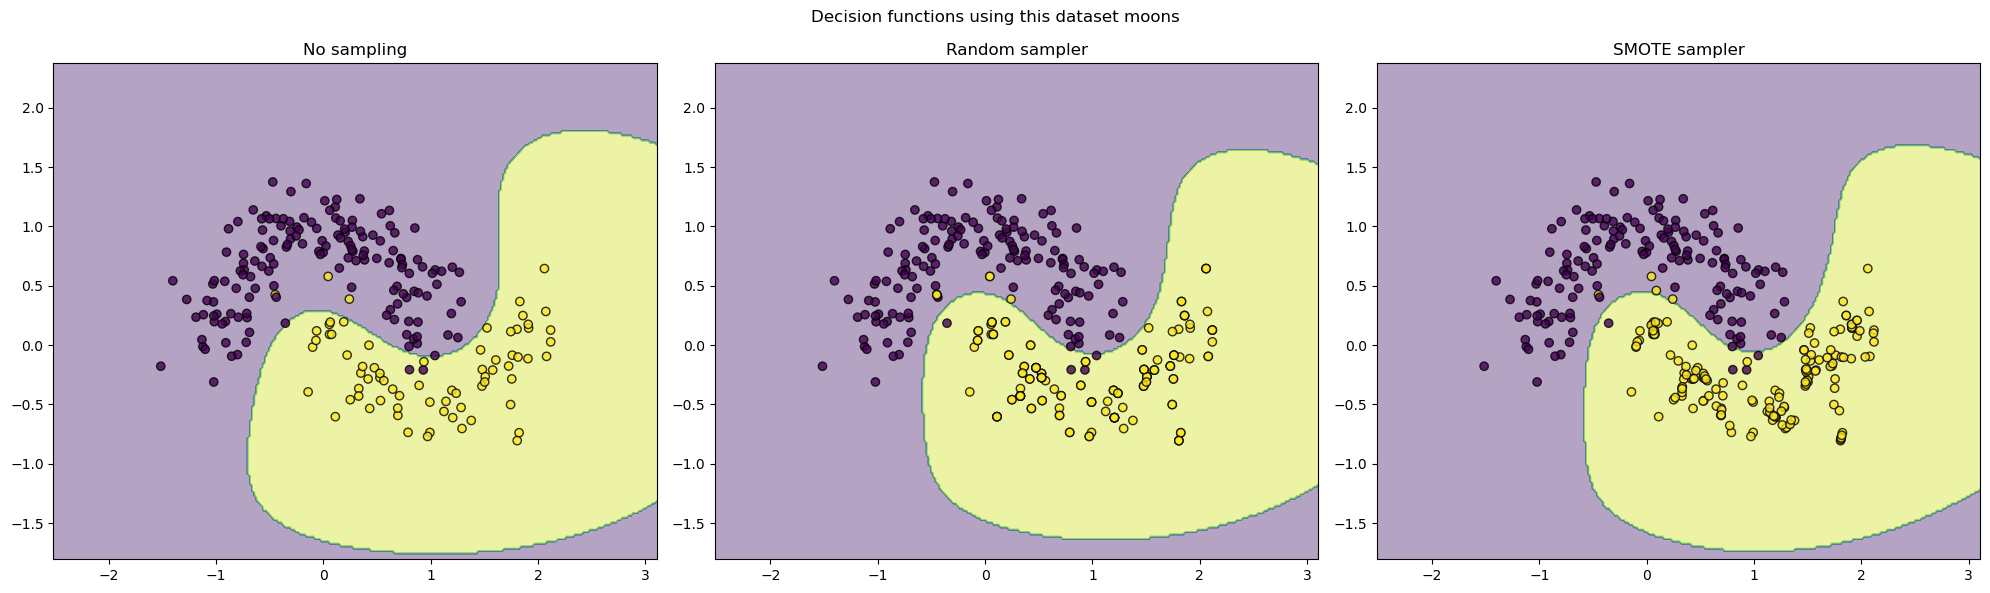

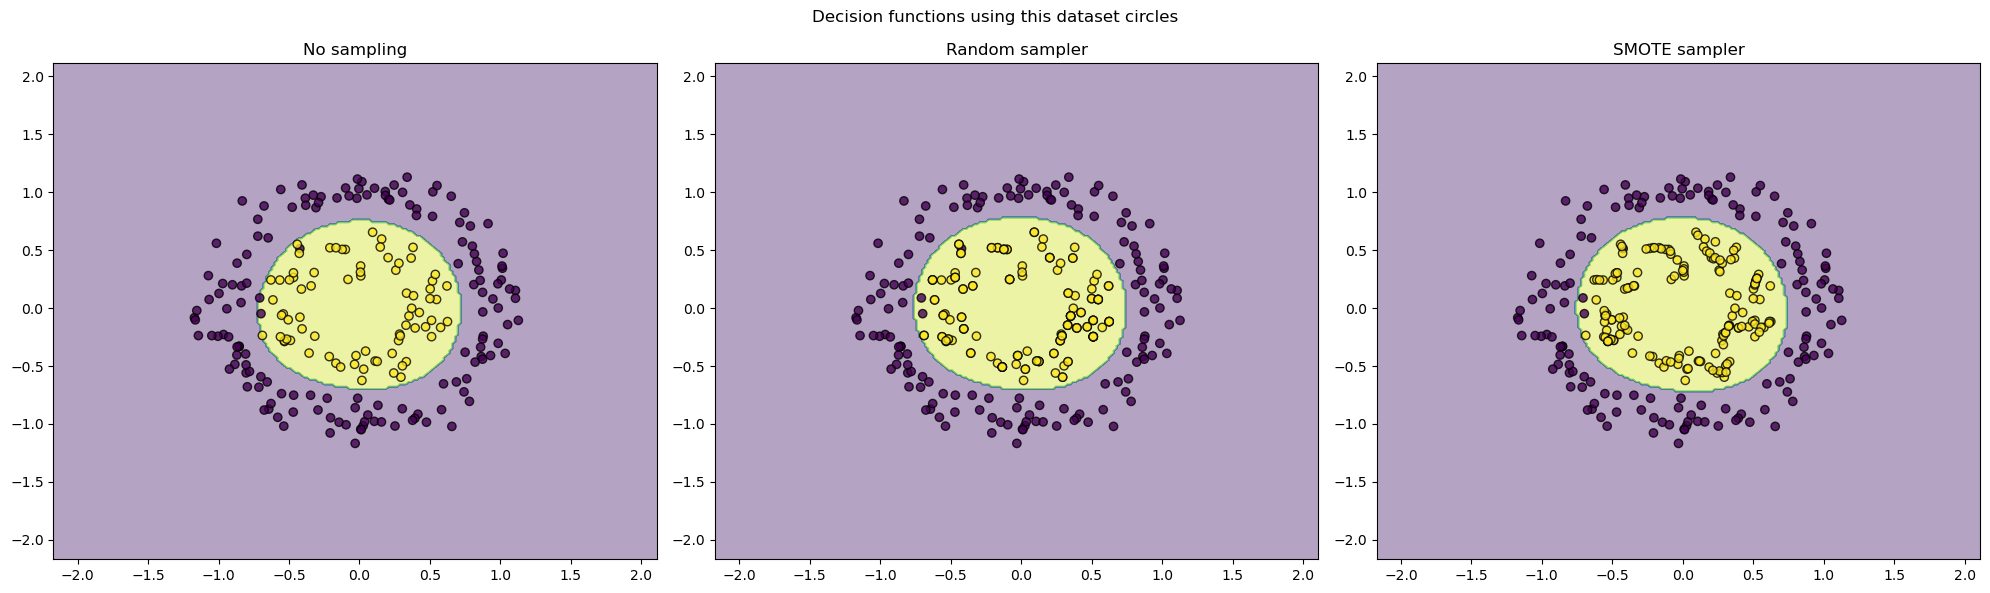

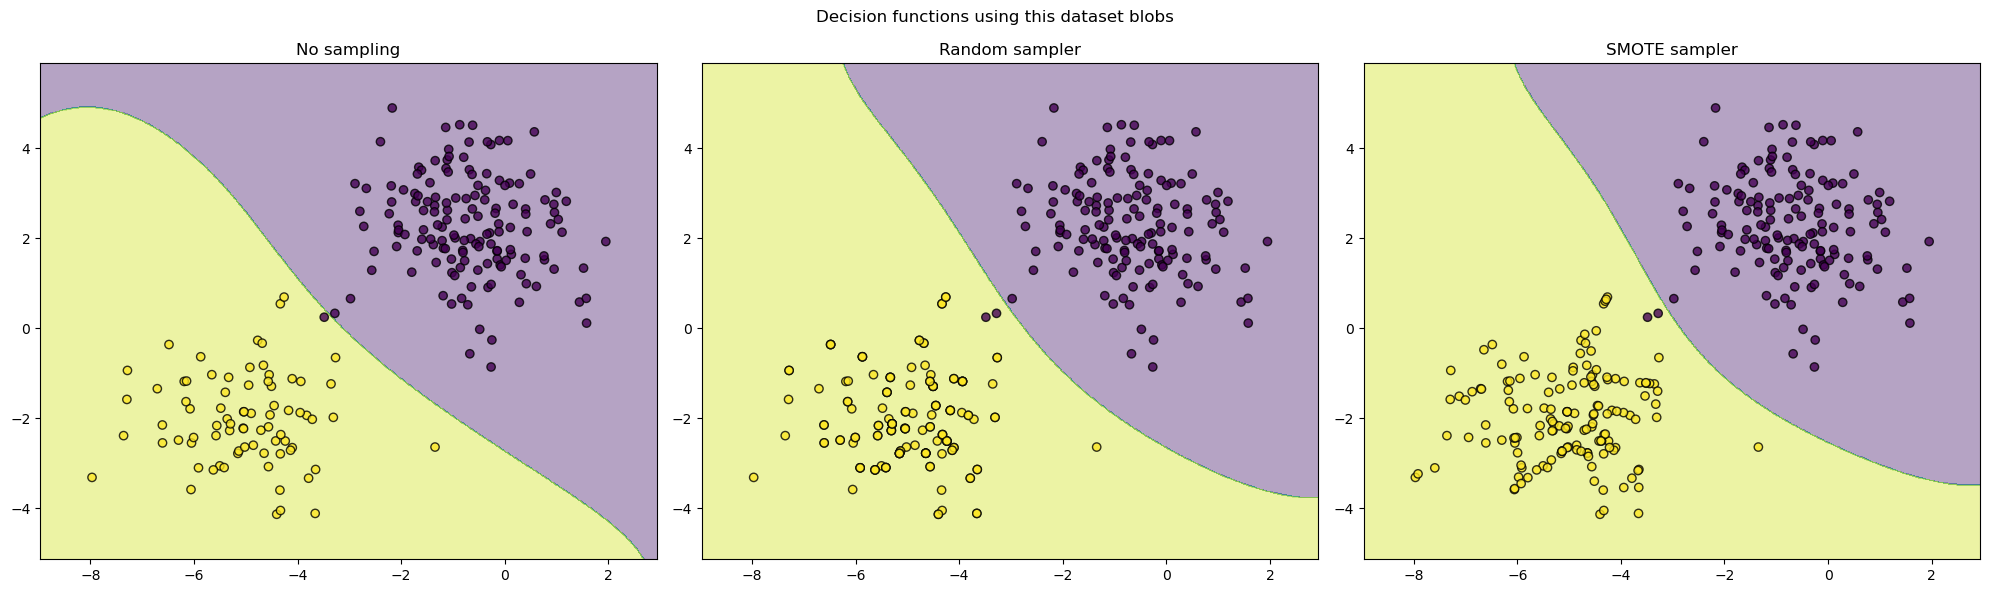

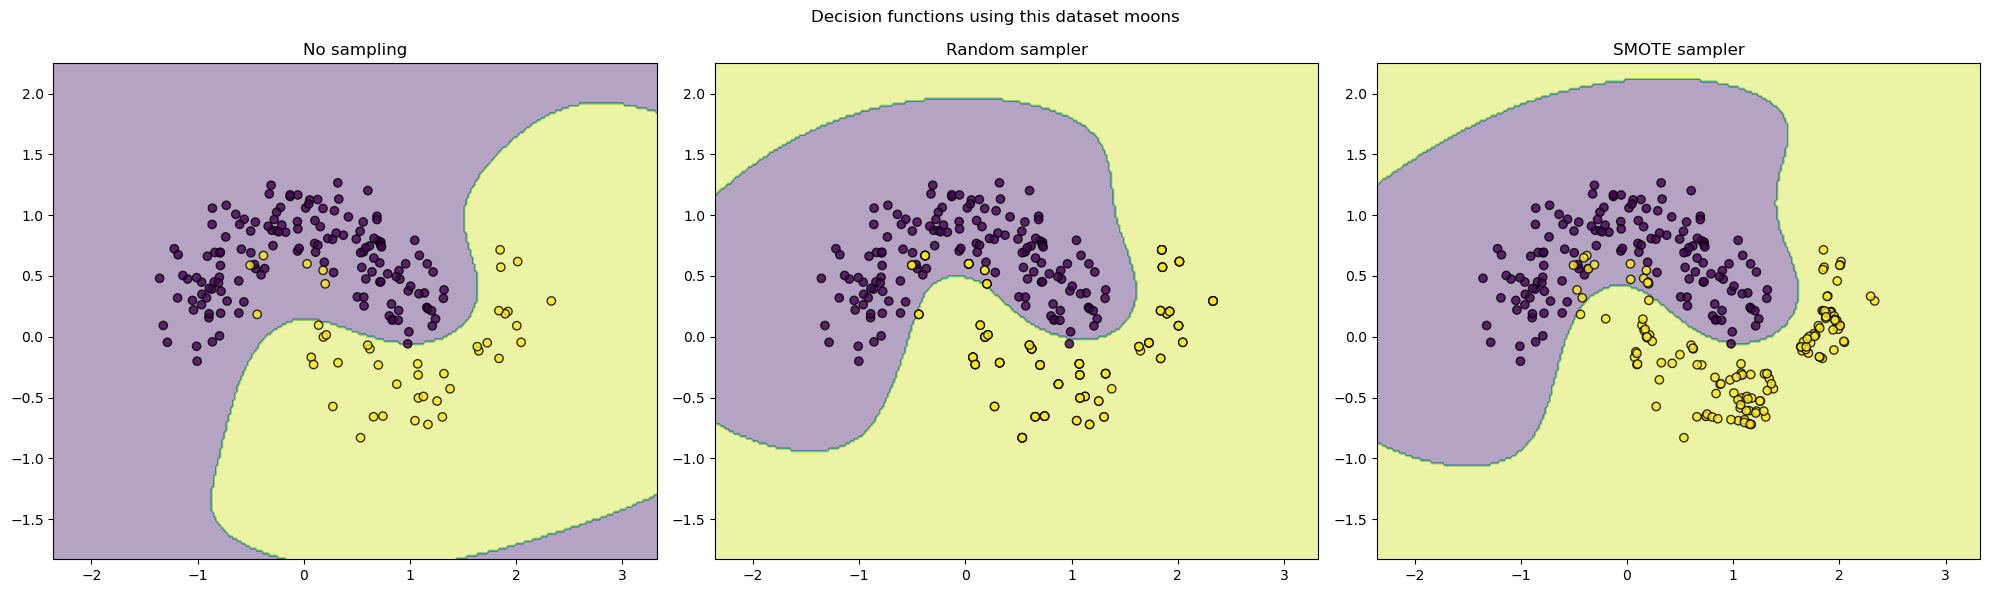

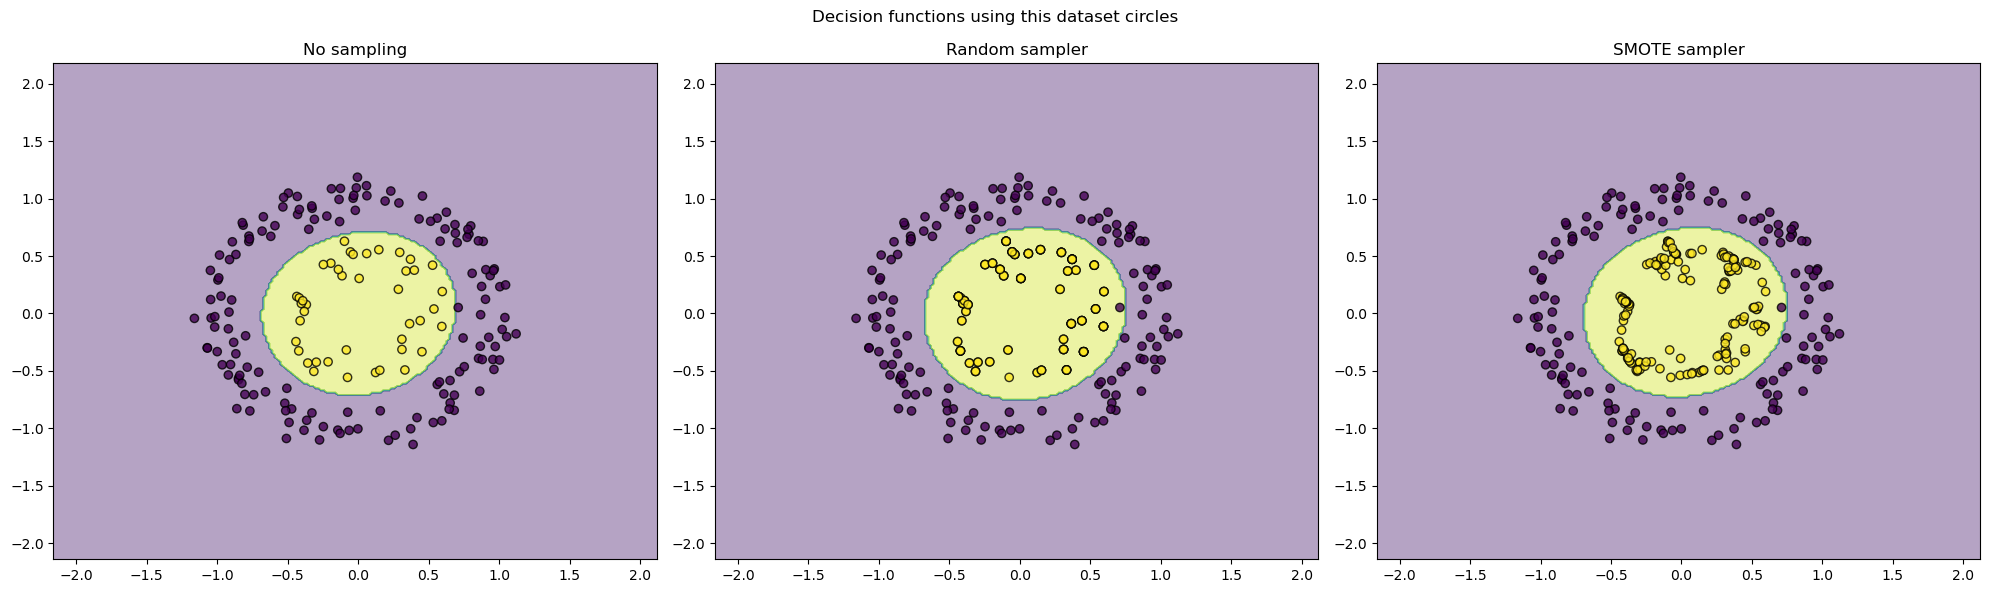

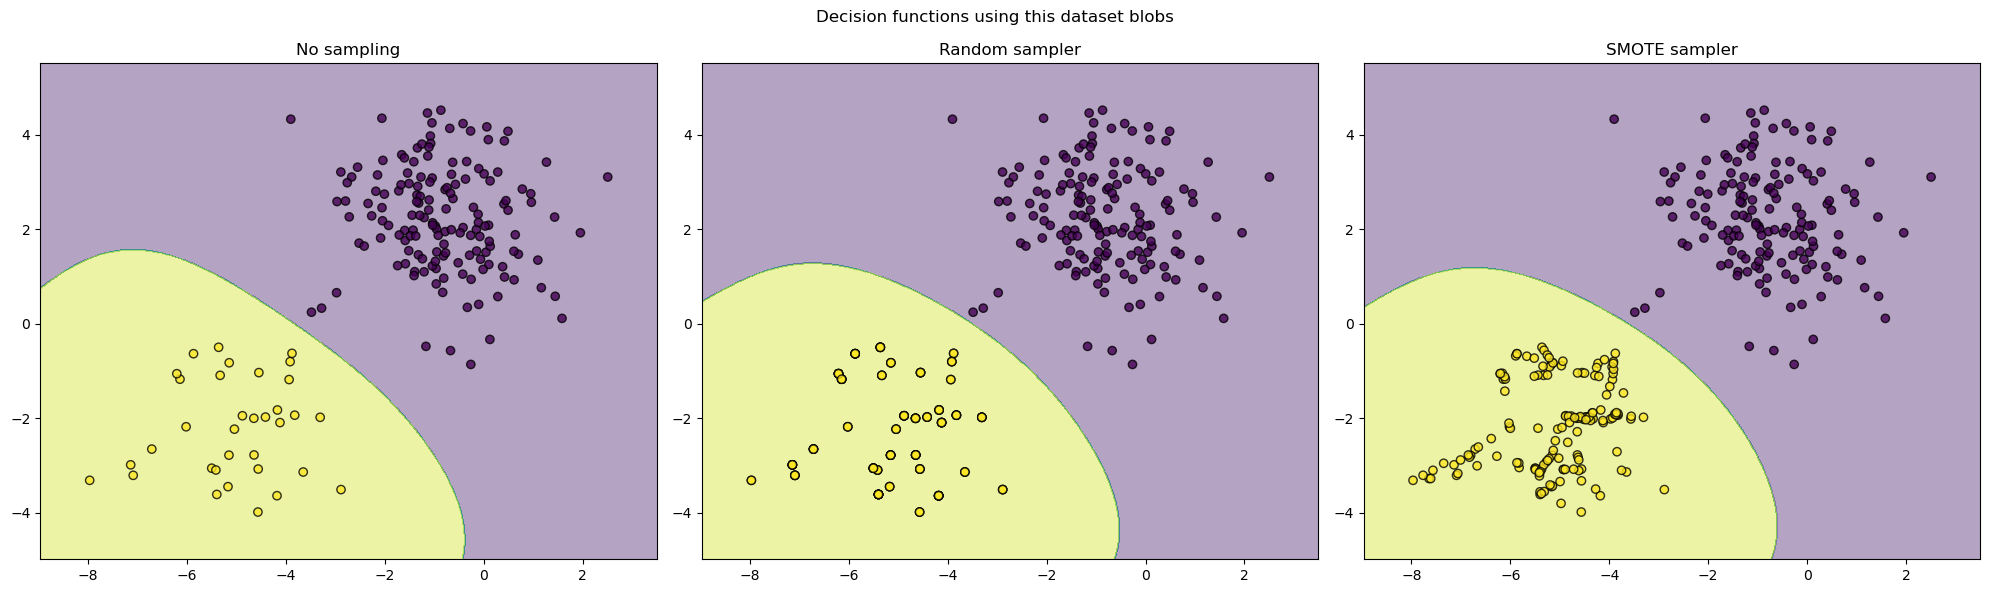

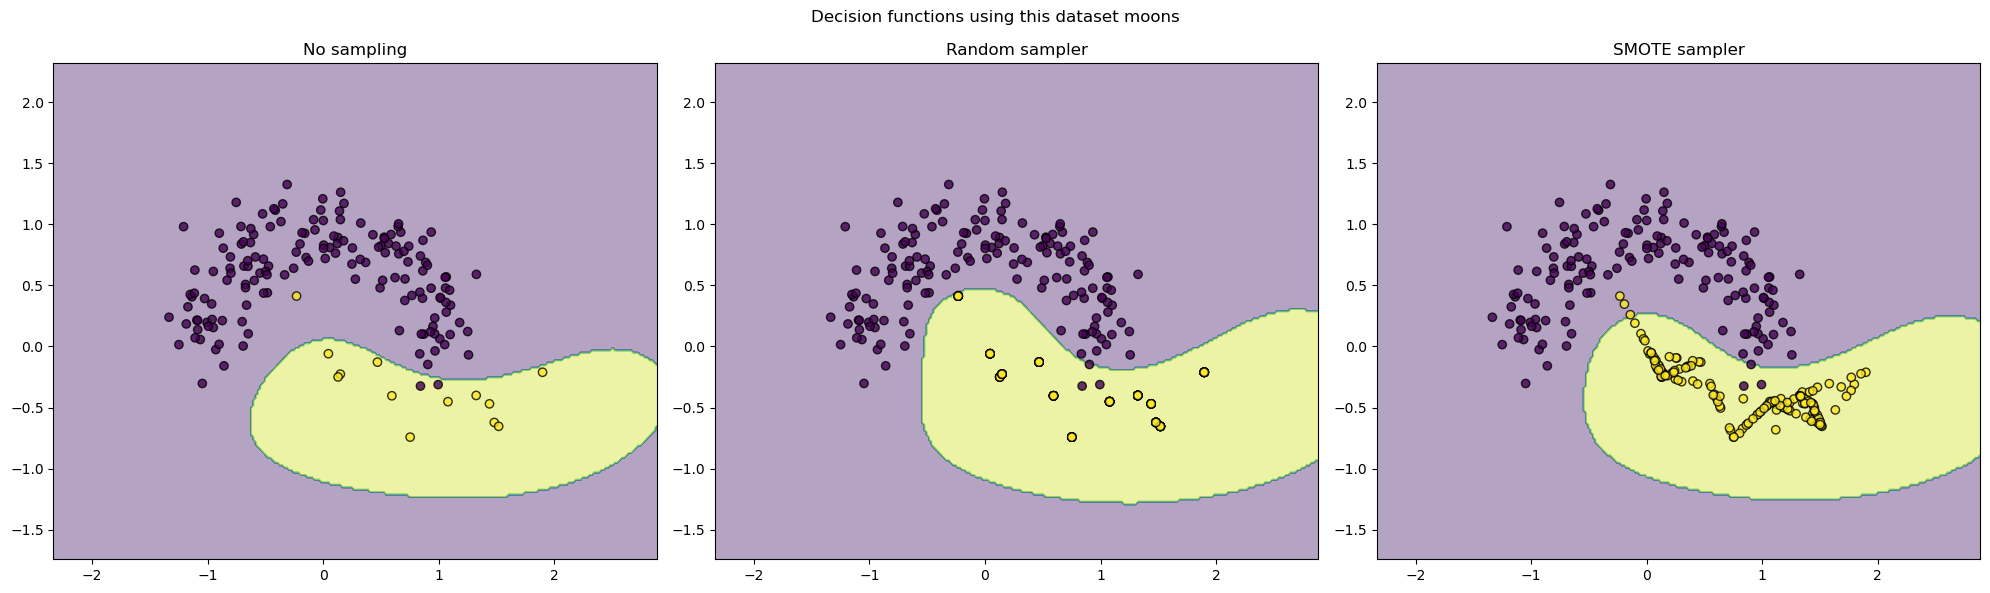

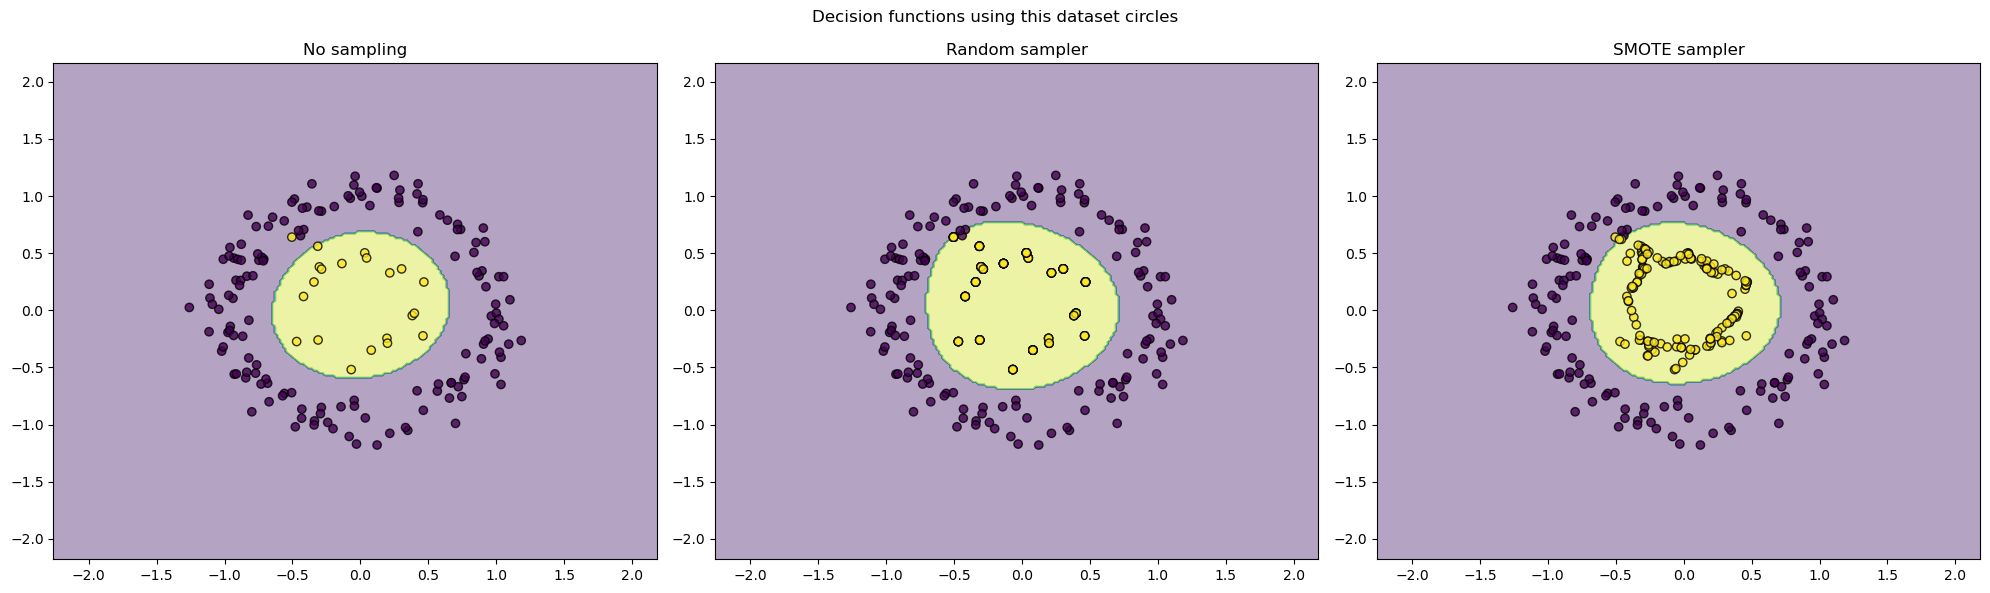

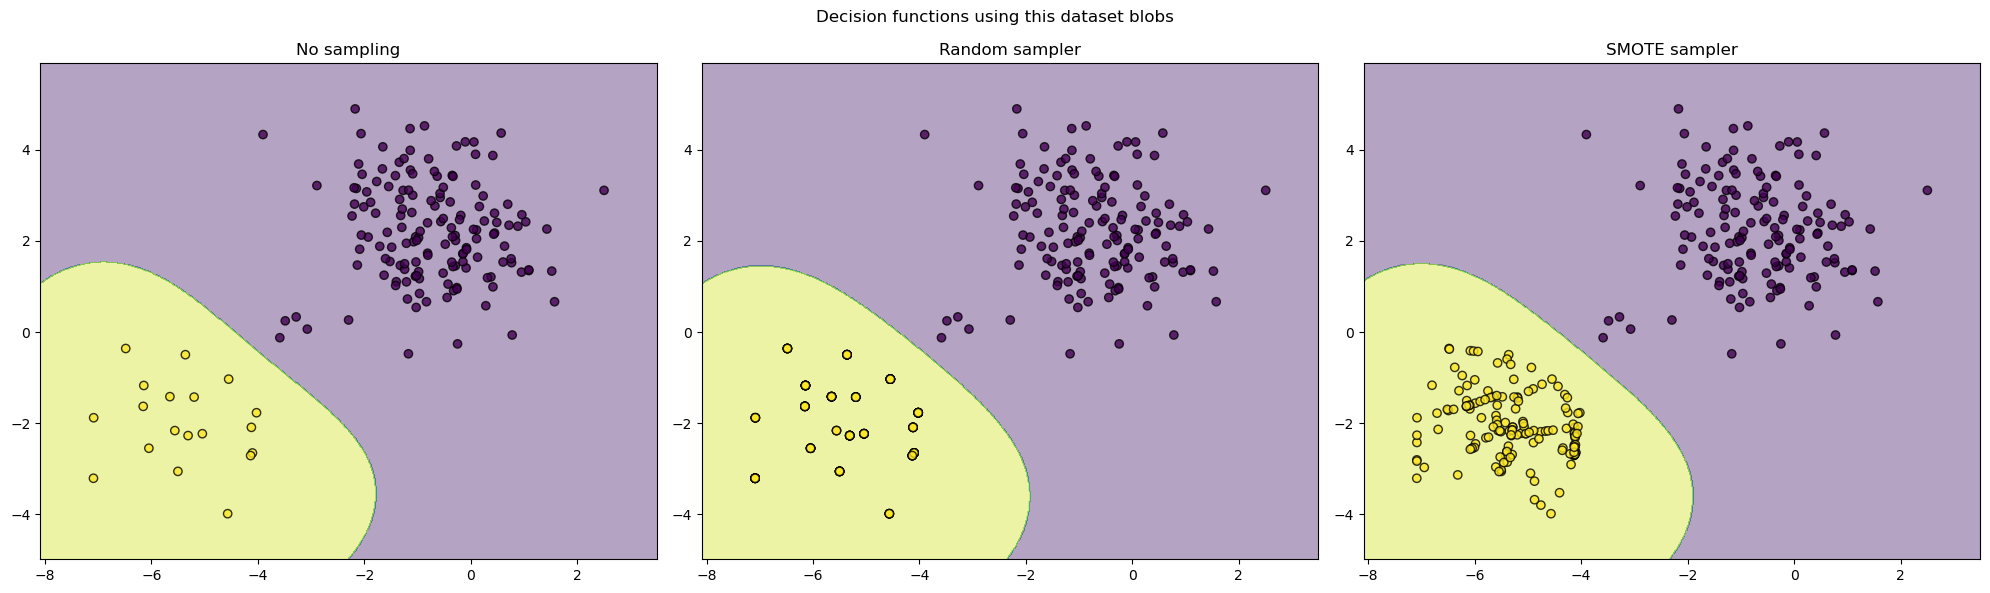

In [8]:
minority_class_imbalance = [2,4,8]

amount_of_samples = 300


models = {
    "No sampling": make_pipeline(StandardScaler(),SVC(gamma='auto')),
    "Random sampler": make_pipeline(StandardScaler(),RandomOverSampler(random_state=42),SVC(gamma='auto')),
    "SMOTE sampler": make_pipeline(StandardScaler(),SMOTE(random_state=42),SVC(gamma='auto')),
}
datasets_scores = {
        2 : {
            "moons" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}},
            "circles" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}},
            "blobs" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}}
            },
         4 : {
            "moons" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}},
            "circles" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}},
            "blobs" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}}
            },
         8 : {
            "moons" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}},
            "circles" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}},
            "blobs" : {"No sampling" : {"accuracy" : 0, "f1-score" : 0} , "Random sampler" : {"accuracy" : 0, "f1-score" : 0},"SMOTE sampler" : {"accuracy" : 0, "f1-score" : 0}}
            }  
    }
    
for imbalance in minority_class_imbalance:
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("Imbalance rate: ")
    print(imbalance)
    datasets = [
        make_moons(noise=0.2, random_state=0, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)]),
        make_circles(noise=0.1, factor=0.5, random_state=1, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)]),
        make_blobs( random_state=1,  center_box=[-5,5] , cluster_std= 1.1, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)])
    ]
    datasets_name = ["moons", "circles", "blobs"]
    
    
    for ds_cnt, ds in enumerate(datasets):
        print("-------------------------------------------------------------------------------------------------------")
        print("-------------------------------------------------------------------------------------------------------")
        print("Type of dataset: ")
        print(datasets_name[ds_cnt])
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
        for ax , (title,model) in zip(axs, models.items()):
            
            average_score = 0
            average_f1_score = 0
            print("-------------------------------------------------------------------------------------------------------")
            print("Type of oversampler:")
            print(title)
            for random_state_idx in range(0,10):
                X, y = ds
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.5, random_state=random_state_idx
                )
                model.fit(X_train, y_train)
                
                y_pred =  model.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, y_test)
                average_f1_score = f1_score(y_pred, y_test, pos_label=1) + average_f1_score
                
            if title == "No sampling":
                plot_decision_function(X_train, y_train, model, ax=ax, title=title)
                
            elif title == "Random sampler":
                ros = RandomOverSampler(random_state=42)
                X_res, y_res = ros.fit_resample(X_train, y_train)
                plot_decision_function(X_res, y_res, model, ax=ax, title=title)
                
            elif title == "SMOTE sampler":
                ros = SMOTE(random_state=42)
                X_res, y_res = ros.fit_resample(X_train, y_train)
                plot_decision_function(X_res, y_res, model, ax=ax, title=title)
                
            datasets_scores[imbalance][datasets_name[ds_cnt]][title]["accuracy"] = average_score/10
            datasets_scores[imbalance][datasets_name[ds_cnt]][title]["f1-score"] = average_f1_score/10
            
        fig.suptitle("Decision functions using this dataset " + datasets_name[ds_cnt])
        fig.tight_layout()
                

        
    
print(datasets_scores)    
    



### 1.4.1 Moon dataset results

| Accuracy (Moon dataset)   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.964  | 0.963  | 0.968  |
| Class imbalance 1/4   | 0.967  | 0.976  | 0.975  |
| Class imbalance 1/8   | 0.944  | 0.949  | 0.954  |


| f1-score (Moon dataset)   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.946  | 0.948  | 0.952  |
| Class imbalance 1/4   | 0.914  | 0.940  | 0.937  |
| Class imbalance 1/8   | 0.721  | 0.794  | 0.813  |

### 1.4.2 Circles dataset results

| Accuracy (Circles dataset)   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.993  | 0.992  | 0.994  |
| Class imbalance 1/4   | 0.997  | 0.996  | 0.997  |
| Class imbalance 1/8   | 0.995  | 0.995  | 0.996  |


| f1-score (Circles dataset)   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.989  | 0.989  | 0.991  |
| Class imbalance 1/4   | 0.993  | 0.991  | 0.992  |
| Class imbalance 1/8   | 0.979  | 0.977  | 0.983  |

### 1.4.3 Blobs dataset results

| Accuracy (Blobs dataset)   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.995  | 0.991  | 0.992  |
| Class imbalance 1/4   | 0.996  | 0.993  | 0.994  |
| Class imbalance 1/8   | 0.996  | 0.990  | 0.995  |


| f1-score (Blobs dataset)   | no resampling  | random resampling  | Smote resampling  |
|---|---|---|---|
| Class imbalance 1/2  | 0.992  | 0.987  | 0.989  |
| Class imbalance 1/4   | 0.989  | 0.981  | 0.983  |
| Class imbalance 1/8   | 0.981  | 0.957  | 0.976  |


### 1.4.4 Conclusion results

For both Moon and circle datasets the support vector machine classifier performs better while the blobs dataset consistently performs worse with oversampling. So why is this? 
A mathematical proof would be rigorous and complete although it might be difficult to construct. As a substitute we will look at the data.

The blobs dataset is essentially the only dataset that is linearly seperable, the moon and circles dataset are certainly not linearly seperable so to make them linearly seperable a feature mapping is needed from the RBF-kernel of the Suport Vector Machine. Two conclusions can arrise from this observations:
1. The oversampled data create in the case of the Moon and Circles dataset a better feature mapping that makes it easier to construct a good hyperplane to seperate the data.
2. In the blobs dataset there is no extra data needed to seperate the 2 classes since the unmapped data is already linearly seperable. Creating extra data with SMOTE or random oversampling generates an overfitting on the data.

Furthermore in almost all cases SMOTE oversampling is better than random oversampling. 

So as found in https://www.jair.org/index.php/jair/article/view/10302/24590, there is a benefit from using oversampling to improve the result of the fitting.

## 1.5 Experiment setup for Audio data
https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs?datasetId=2749&sortBy=voteCount

### 1.5.1 Transfer learning model
For this audio classification Densenet is used: 
<center> <img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-20_at_11.35.53_PM_KroVKVL.png" ></center>
The paper of densenet can be found at: https://arxiv.org/pdf/1608.06993.pdf
A little notice will be layed on the type of layers and their usage.

#### 1.5.1.1 Convolution layer
A convolutional layer in essence exists of 3 things:
- An input vector (The image) for example of dimensions (128,128,3)
- A filter (feature detector) that will extract features from an image.
- An output matrix that functions as feature map.
<center> <img src="https://www.researchgate.net/profile/Hiromu-Yakura/publication/323792694/figure/fig1/AS:615019968475136@1523643595196/Outline-of-the-convolutional-layer.png" ></center>

#### 1.5.1.2 Dense layer
A dense layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer.
<center> <img src="https://www.researchgate.net/profile/Hadley-Brooks/publication/270274130/figure/fig3/AS:667886670594050@1536247999230/Architecture-of-a-multilayer-neural-network-with-one-hidden-layer-The-input-layer.png" ></center>

#### 1.5.1.3 Dense block
A Dense Block is a module used in convolutional neural networks that connects all layers (with matching feature-map sizes) directly with each other.
Note that these are the outputs of convolutional layers as explained in 1.5.1.1
<center> <img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-20_at_11.33.17_PM_Mt0HOZL.png" ></center>

#### 1.5.1.4 Pooling layer
A pooling layer will reduce the dimensions of a hidden layer by clustering the previous layer to a new layer that has a lower dimensionality.
In max pooling the maximum value of a cluster will be taken during average pooling the average value of a cluster will be taken, an overview of this can be seen in the image below.
<center> <img src="https://www.researchgate.net/publication/340812216/figure/fig4/AS:928590380138496@1598404607456/Pooling-layer-operation-oproaches-1-Pooling-layers-For-the-function-of-decreasing-the.png" ></center>



In [6]:
import tensorflow as tf

pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(128,128,3),
                            include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.save_weights('model.h5')

ImportError: `load_weights` requires h5py package when loading weights from HDF5. Try installing h5py.

### 1.5.2 t-SNE visualization

Because of the high-dimensionality of the data it is not possible to plot the decision boundouries as done in the lower dimensional data. To overcome this difficulty t-SNE is used in combination with the node weights of the last layer before classifcation.
So visually the last non output layer will be chosen sas input for the t-SNE visualization. 
<center> <img src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/01/embedding_layer.png" ></center>
The way of working is based on following paper:

https://arxiv.org/pdf/2107.12547.pdf





In [12]:
def TSNE_visualization(model, testX, title):


    model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    features = model2(testX)
    features = np.nan_to_num(features)
    labels = np.argmax(model(testX), axis=-1)
    tsne = TSNE(n_components=2).fit_transform(features)

    def scale_to_01_range(x):

        value_range = (np.max(x) - np.min(x))
        starts_from_zero = x - np.min(x)
        return starts_from_zero / value_range
    print("The Labels")
    print(labels)
    tx = tsne[:, 0]
    ty = tsne[:, 1]

    tx = scale_to_01_range(tx)
    ty = scale_to_01_range(ty)

    colors = ['red', 'blue']
    classes = ["cat" , "dog"]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(labels) if idx == l]
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax.scatter(current_tx, current_ty, c=c, label=classes[idx])

    ax.legend(loc='best')
    plt.title(title)
    plt.show()

### 1.5.3 Audio augmentation
For the audio augmentation a library called audiomentations is used:

https://zenodo.org/record/7885479

The parameters to augment the audio are:

- Adding of GaussianNoise
- Time stretch of the audio
- Pitch Shift of the audio
- Shift of the audio (Cut some of the audio)

The image sent to the neural network is a melspectogram as seen in the image below: 
<center> <img src="https://librosa.org/doc/main/_images/librosa-feature-melspectrogram-1.png" ></center>

The Y-axis denotes the frequency of the noise while the X-axis is used to determine it's point in time, color is used to determine the amplitude of the noise.



For demonstration purposes, some augmentations are listed below.

In [13]:
train_dir = 'catvsdog/cats_dogs/train'
test_dir = 'catvsdog/cats_dogs/test'
train_paths=[]
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        train_paths+=[(os.path.join(dirname, filename))]
test_paths=[]
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        test_paths+=[(os.path.join(dirname, filename))]
        
Name=['dog','cat']
N=list(range(len(Name)))    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))
Wrong_Name=['test','cats']
fix_mapping=dict(zip(Wrong_Name,Name))

https://www.kaggle.com/code/tanulsingh077/audio-albumentations-transform-your-audio#Adding-Noise




In [14]:
class AudioTransform(BasicTransform):
    """ Transform for audio task. This is the main class where we override the targets and update params function for our need"""

    @property
    def targets(self):
        return {"data": self.apply}
    
    def update_params(self, params, **kwargs):
        if hasattr(self, "interpolation"):
            params["interpolation"] = self.interpolation
        if hasattr(self, "fill_value"):
            params["fill_value"] = self.fill_value
        return params

#### 1.5.3.1 Gaussian noise

In [15]:
class AddGaussianNoisee(AudioTransform):
    """ Do time shifting of audio """
    def __init__(self, always_apply=False, p=0.5):
        super(AddGaussianNoise, self).__init__(always_apply, p)
        
        
    def apply(self,data,**params):
        '''
        data : ndarray of audio timeseries
        ''' 
        noise = np.random.randn(len(data))
        data_wn = data + 0.005*noise
        return data_wn
    


In [16]:
audio_path = 'catvsdog/cats_dogs/cat_1.wav'

y,sr = librosa.load(audio_path,sr=22050)

print('Audio Intially')
ipd.Audio(y, rate=sr)

Audio Intially


In [17]:
transform = AddGaussianNoisee(p=1.0)

print('audio after transform')
ipd.Audio(transform(data=y)['data'],rate=sr)

TypeError: super(type, obj): obj must be an instance or subtype of type

#### 1.5.3.2 Pitch shift

In [ ]:
class PitchShift(AudioTransform):
    """ Do time shifting of audio """
    def __init__(self, always_apply=False, p=0.5 , n_steps=None):
        super(PitchShift, self).__init__(always_apply, p)
        '''
        nsteps here is equal to number of semitones
        '''
        
        self.n_steps = n_steps
        
    def apply(self,data,**params):
        '''
        data : ndarray of audio timeseries
        '''        
        return librosa.effects.pitch_shift(data,sr=22050,n_steps=self.n_steps)

In [ ]:
audio_path = 'catvsdog/cats_dogs/cat_1.wav'

y,sr = librosa.load(audio_path,sr=22050)

print('Audio Intially')
ipd.Audio(y, rate=sr)

In [ ]:
transform = PitchShift(p=1.0,n_steps=4)

print('audio after transform')
ipd.Audio(transform(data=y)['data'],rate=sr)

### 1.5.4 Experiment setup for validation

The experiment again has a simular approach, the experiment will be run 3 times each with a different rate of inbalance.

In [18]:
def retrieve_data_train(train_paths, train, train_labels,dog_amount):
    
    amount_of_dogs = 0 
    imbalance = 0
    
    for path in train_paths:
        label=path.split('\\')[-2]
        if label == "dog":
            imbalance = imbalance - 1
            amount_of_dogs = amount_of_dogs +1
        elif label == "cat":
            imbalance = imbalance + 1
        if amount_of_dogs > dog_amount:
            break
        y, sr = librosa.load(path)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        img=log_mel_spectrogram
        img=cv2.resize(np.array(img),dsize=(128,128))
        X=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        train+=[X*255]
        train_labels+=[normal_mapping[label]]
    return train , train_labels , imbalance

def retrieve_data_train_augment(train_paths, train, train_labels,dog_amount):
    amount_of_dogs = 0 
    imbalance = 0
    
    augment = Compose([
        AddGaussianNoise(min_amplitude=0.0001, max_amplitude=0.01, p=0.5),
        TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
        PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
        Shift(min_fraction=-0.25, max_fraction=0.25, p=0.5),
    ])
    
    # data augmentation
    while imbalance != 0:
        for path in train_paths:
            label=path.split('\\')[-2]
            if imbalance == 0:
                break
            elif label == "dog":
                y, sr = librosa.load(path)
                y = augment(samples=y, sample_rate=sr)
                mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
                img=log_mel_spectrogram
                img=cv2.resize(np.array(img),dsize=(128,128))
                X=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
                train+=[X*255]
                train_labels+=[normal_mapping[label]]
                imbalance = imbalance - 1
    return train , train_labels , imbalance



def retrieve_data_test(test_paths, test, test_labels):
    for path in test_paths:
        label=path.split('\\')[-2]
        y, sr = librosa.load(path)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        img=log_mel_spectrogram
        img=cv2.resize(np.array(img),dsize=(128,128))
        X=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        test+=[X*255]
        test_labels+=[normal_mapping[fix_mapping[label]]]
        
    return test , test_labels

def report_data(testX,test_labels,experiment_basis,model):
    y_pred = model.predict(testX)
    y_pred2 = np.argmax(y_pred,axis=1)
    ground = np.argmax(test_labels,axis=1)
    print(classification_report(ground,y_pred2,target_names=Name,digits=4))
    cm = confusion_matrix(ground, y_pred2, normalize = 'true')
    disp = ConfusionMatrixDisplay(cm, display_labels=["dog" , "cat"]).plot()
    disp.ax_.set_title(experiment_basis)
    
    
    

In [20]:
Amount_of_dogs = [85,63,30]
EPOCHS=1

pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(128,128,3),
                            include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.save_weights('model.h5')

for dog_amount in Amount_of_dogs:
    experiment_string = ''
    experiment_string = experiment_string + "Amount of dog/cat rate: " + str(dog_amount/125)
    
    train=[]
    train_labels=[]
    imbalance = 0
    #Data gathering train
    train , train_labels , imbalance = retrieve_data_train(train_paths, train, train_labels, dog_amount)
    
    test=[]
    test_labels=[]
    #data gathering test
    test , test_labels  = retrieve_data_test(test_paths, test, test_labels)
    
    trainX_no_augment = np.array(train)
    testX_no_augment = np.array(test)
    train_labels_no_augment = np.array(train_labels)
    test_labels_no_augment = np.array(test_labels)
    train_labels_no_augment = to_categorical(train_labels)
    test_labels_no_augment = to_categorical(test_labels)
    
    experiment_basis = experiment_string + " no weight balancing"
    model.load_weights('model.h5')

    his=model.fit(x= trainX_no_augment, y = train_labels_no_augment,
                  validation_data=(testX_no_augment,test_labels_no_augment),epochs=EPOCHS)
    model.save('modelentire.h5')
    model = load_model("modelentire.h5")
    report_data(testX_no_augment,test_labels_no_augment,experiment_basis,model)
    
    TSNE_visualization(model, testX_no_augment, experiment_basis)
    model.load_weights('model.h5')
    #########################################################################################################################
    ######################################            Weight balacing          ##############################################
    #########################################################################################################################
    experiment_weight = experiment_string + "weight balancing"
    his=model.fit(x= trainX_no_augment, y = train_labels_no_augment,
                  validation_data=(testX_no_augment,test_labels_no_augment),epochs=EPOCHS,  class_weight= { 0 : 125/dog_amount , 1 : dog_amount/125 })
    model.save('modelentire.h5')
    model = load_model("modelentire.h5")
    report_data(testX_no_augment,test_labels_no_augment,experiment_weight,model)
    TSNE_visualization(model, testX_no_augment , experiment_weight)
    model.load_weights('model.h5')
    
    #########################################################################################################################
    ######################################            Augmentations            ##############################################
    #########################################################################################################################
    retrieve_data_train_augment(train_paths, train, train_labels,dog_amount)
    
    trainX = np.array(train)
    testX = np.array(test)
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    count_dog = 0
    count_cat = 0

    for label in train_labels:
        if label[1] == 1:
            count_cat = count_cat + 1
        elif label[1] == 0:
            count_dog = count_dog + 1
            
            
    experiment_aug = experiment_string + " With augmentation"
    model.load_weights('model.h5')
    his=model.fit(x= trainX, y = train_labels,
                  validation_data=(testX,test_labels),epochs=EPOCHS)
    model.save('modelentire.h5')
    model = load_model("modelentire.h5" )
    report_data(testX,test_labels,experiment_aug,model)
    TSNE_visualization(model, testX, experiment_aug)
    model.load_weights('model.h5')


ImportError: `load_weights` requires h5py package when loading weights from HDF5. Try installing h5py.

In [ ]:
def shrink_vector(vector, max_val):
    replacement = []
    for i in vector:
        if i > max_val:
            break
        else:
            replacement.append(i)
    return replacement
    

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 2

model = Sequential([
    InputLayer(input_shape = (64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    GlobalMaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(1024,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')

])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.save_weights("modelimage.h5")

In [ ]:
def TSNE_visualization(model, testX, title):
    

    model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    y_pred = []
    for p, _ in testX.take(1): # Takes 1 batch
        features = model2(p)         # Predict 1 batch
        preds = model.predict(p)

        for prediction in preds:
            if prediction[0] > 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
    
    labels = y_pred

    tsne = TSNE(n_components=2).fit_transform(features)

    def scale_to_01_range(x):

        value_range = (np.max(x) - np.min(x))
        starts_from_zero = x - np.min(x)
        return starts_from_zero / value_range

    tx = tsne[:, 0]
    ty = tsne[:, 1]

    tx = scale_to_01_range(tx)
    ty = scale_to_01_range(ty)

    colors = ['red', 'blue']
    classes = ["Chihuaha" , "Cookie"]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(labels) if idx == l]
        indices = shrink_vector(indices, len(tx) - 1)
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax.scatter(current_tx, current_ty, c=c, label=classes[idx])

    ax.legend(loc='best')
    plt.title(title)
    plt.show()

In [ ]:
paths_to_test = ['muffinchi/train' ,'muffinchi/train_12' , 'muffinchi/train_14' ,'muffinchi/train_12aug' , 'muffinchi/train_14aug' ]
EPOCHS = 50

for path_to_test in paths_to_test:
    
    experiment_string = ''
    
    
    train_dir = path_to_test
    test_dir = 'muffinchi/test'
    AUTOTUNE = tf.data.AUTOTUNE

    train_set = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        seed=42,
        batch_size=512,
        labels='inferred',
        label_mode='int',
        shuffle=True,
        image_size=(64, 64))

    test_set = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        batch_size=512,
        seed=42,
        labels='inferred',
        label_mode='int',
        shuffle=True,
        image_size=(64, 64))
    
    class_names = train_set.class_names
    class_counts = [0] * len(class_names)
    for images, labels in train_set:
        for label in labels:
            class_counts[label] += 1
    print(class_names)
    print(class_counts)
    
    experiment_string = experiment_string + "Amount of Chihuaha/Cookie rate: " + str(class_counts[0]/class_counts[1])
    if path_to_test == 'muffinchi/train_12aug' or path_to_test == 'muffinchi/train_14aug':
        experiment_string = experiment_string + ' with balance due to augmentation'
    
    
    
    train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) 
    test_set= test_set.cache().prefetch(buffer_size=AUTOTUNE)
    normalization_layer = layers.Rescaling(1./255)
    normalized_ds = train_set.map(lambda x, y: (normalization_layer(x), y))
    image_batch, labels_batch = next(iter(normalized_ds))
    model.load_weights("modelimage.h5")
    history = model.fit(train_set, epochs= EPOCHS,validation_data= test_set, validation_steps= None, shuffle= False)
    

    
    
    y_pred = []  # store predicted labels
    y_true = []  # store true labels

    # iterate over the dataset
    for image_batch, label_batch in test_set:   # use dataset.unbatch() with repeat
        # append true labels
        y_true.append(label_batch.numpy().tolist())
        # compute predictions
        preds = model.predict(image_batch)

        # append predicted labels
        for prediction in preds:
            if prediction[0] > 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
            
    
    y_true = [item for sublist in y_true for item in sublist]


    print(classification_report(y_pred,y_true,digits=4))
    
    
    cm = confusion_matrix(y_pred,y_true, normalize = 'true')
    disp = ConfusionMatrixDisplay(cm, display_labels=["Chihuaha" , "Cookie"]).plot()
    disp.ax_.set_title(experiment_string)
    
    
    model.save('modelentireimage.h5')
    model = load_model("modelentireimage.h5" )
    TSNE_visualization(model, test_set, experiment_string)
    
    
    
    if path_to_test == 'muffinchi/train_12aug' or path_to_test == 'muffinchi/train_14aug':
        continue
    else:
        if path_to_test == 'muffinchi/train_12':
            print("Weight balancing 1/2")
            model.load_weights("modelimage.h5")
            history = model.fit(train_set, epochs= EPOCHS,validation_data= test_set, validation_steps= None, shuffle= False ,  class_weight= { 0 : 1/2 , 1 : 1 })
            cm = confusion_matrix(ground, y_pred2, normalize = 'true')
            disp = ConfusionMatrixDisplay(cm, display_labels=["Chihuaha" , "Cookie"]).plot()
            disp.ax_.set_title(experiment_string)
            model.save('modelentireimage.h5')
            model = load_model("modelentireimage.h5" )
            TSNE_visualization(model, test_set, experiment_string)
            
        elif path_to_test == 'muffinchi/train_14':
            print("Weight balancing 1/4")
            history = model.fit(train_set, epochs= EPOCHS,validation_data= test_set, validation_steps= None, shuffle= False ,  class_weight= { 0 : 1/4 , 1 : 1 })
            model.load_weights("modelimage.h5")
            cm = confusion_matrix(ground, y_pred2, normalize = 'true')
            disp = ConfusionMatrixDisplay(cm, display_labels=["Chihuaha" , "Cookie"]).plot()
            disp.ax_.set_title(experiment_string)
            model.save('modelentireimage.h5')
            model = load_model("modelentireimage.h5" )
            TSNE_visualization(model, test_set, experiment_string)
            


# How does the incorporation of time series analysis techniques enhance the accuracy and forcasting capabilities of regression models for time-dependent data and how do they perform oposed to each other?

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting

x, y, coef = datasets.make_regression(n_samples=1000,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=100000000,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))
x = np.sort(x, axis = 0)


# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))
y = np.sort(y, axis = 0)




dataframe_experiment = pd.DataFrame({'X': x.flatten(), 'Y': y}, columns=['X', 'Y'])
dataframe_experiment.head()

In [ ]:
train_df, test_df = train_test_split(dataframe_experiment, test_size=0.5, shuffle=False)




X_train = train_df.iloc[:, 0:-1]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, 0:-1]
y_test = test_df.iloc[:, -1]

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(predictions)




In [ ]:
huber = HuberRegressor().fit(X_train, y_train)
huber_pedictions_no_features = huber.predict(X_test)


In [ ]:
dataframe_experiment = pd.DataFrame({'X': x.flatten(), 'Y': y}, columns=['X', 'Y'])
dataframe_experiment.head()
train_df, test_df = train_test_split(dataframe_experiment, test_size=0.5, shuffle=False)



train_df['SMA2'] = train_df['Y'].rolling(2).mean()
train_df['SMA4'] = train_df['Y'].rolling(4).mean()
train_df['SMA8'] = train_df['Y'].rolling(8).mean()

train_df['SMA15'] = train_df['Y'].rolling(15).mean()
train_df['SMA30'] = train_df['Y'].rolling(30).mean()



train_df['CMA'] = train_df['Y'].expanding().mean()


train_df['EWMA4'] = train_df['Y'].ewm(4).mean()
train_df['EWMA8'] = train_df['Y'].ewm(8).mean()

train_df['EWMA15'] = train_df['Y'].ewm(15).mean()
train_df['EWMA30'] = train_df['Y'].ewm(30).mean()



test_df['SMA2'] = test_df['Y'].rolling(2).mean()
test_df['SMA4'] = test_df['Y'].rolling(4).mean()
test_df['SMA8'] = test_df['Y'].rolling(8).mean()

test_df['SMA15'] = test_df['Y'].rolling(15).mean()
test_df['SMA30'] = test_df['Y'].rolling(30).mean()



test_df['CMA'] = test_df['Y'].expanding().mean()


test_df['EWMA4'] = test_df['Y'].ewm(4).mean()
test_df['EWMA8'] = test_df['Y'].ewm(8).mean()

test_df['EWMA15'] = test_df['Y'].ewm(15).mean()
test_df['EWMA30'] = test_df['Y'].ewm(30).mean()


backup = train_df['Y']
train_df=train_df.loc[:,train_df.columns!='Y']
train_df['Y']= backup


backup = test_df['Y']
test_df=test_df.loc[:,test_df.columns!='Y']
test_df['Y']= backup

test_df = test_df.fillna(method="bfill")
train_df = train_df.fillna(method="bfill")

X_train = train_df.iloc[:, 0:-1]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, 0:-1]
y_test = test_df.iloc[:, -1]

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)
huber = HuberRegressor().fit(X_train, y_train)
huber_pedictions_features = huber.predict(X_test)

In [ ]:
# simple moving averages
test_df['SMA2'] = test_df['Y'].rolling(2).mean()
test_df['SMA4'] = test_df['Y'].rolling(4).mean()
test_df['SMA8'] = test_df['Y'].rolling(8).mean()

test_df['SMA15'] = test_df['Y'].rolling(15).mean()
test_df['SMA30'] = test_df['Y'].rolling(30).mean()



test_df['CMA'] = test_df['Y'].expanding().mean()


test_df['EWMA4'] = test_df['Y'].ewm(4).mean()
test_df['EWMA8'] = test_df['Y'].ewm(8).mean()

test_df['EWMA15'] = test_df['Y'].ewm(15).mean()
test_df['EWMA30'] = test_df['Y'].ewm(30).mean()

In [ ]:
test_df['Hubernofeatures'] = huber_pedictions_no_features
test_df["Huberfeatures"] = huber_pedictions_features

test_df.plot(x="X", y=["Y","SMA2","SMA4","SMA8","SMA15" , "SMA30" , "CMA" ,"EWMA4" ,"EWMA8","EWMA15" ,"EWMA30" , 'Hubernofeatures' , 'Huberfeatures'],kind="line", figsize=(10, 10))
 


In [ ]:
def calculate_multiple_rmse(df,rmse_columns,targetname):
    rmse_dict = {}
    for column in rmse_columns:
        realVals = df[targetname]
        predictedVals = df[column]
        mse = mean_squared_error(realVals, predictedVals, squared=False)
        rmse_dict[column] = mse
    return {k: v for k, v in sorted(rmse_dict.items(), key=lambda item: item[1])}


In [ ]:
test_df = test_df.fillna(method="bfill")
train_df = train_df.fillna(method="bfill")
print(calculate_multiple_rmse(test_df,["SMA2","SMA4","SMA8","SMA15" , "SMA30" , "CMA" ,"EWMA4" ,"EWMA8","EWMA15" ,"EWMA30" , 'Hubernofeatures' , 'Huberfeatures'],"Y"))

## Many Features 
https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [ ]:
dataframe_experiment = pd.read_csv('energydata_complete.csv')
dataframe_experiment['year'] = pd.to_datetime(dataframe_experiment['date']).dt.year
dataframe_experiment['month'] = pd.to_datetime(dataframe_experiment['date']).dt.month
dataframe_experiment['day'] = pd.to_datetime(dataframe_experiment['date']).dt.day
dataframe_experiment['hour'] = pd.to_datetime(dataframe_experiment['date']).dt.hour
dataframe_experiment['minute'] = pd.to_datetime(dataframe_experiment['date']).dt.minute
dataframe_experiment['second'] = pd.to_datetime(dataframe_experiment['date']).dt.second
dataframe_experiment = dataframe_experiment.drop('date', axis=1)

In [ ]:
train_df, test_df = train_test_split(dataframe_experiment, test_size=0.6, shuffle=False)




X_train = train_df.iloc[:, :]
y_train = train_df.loc[:, 'Appliances']
X_train = train_df.drop('Appliances', axis=1)


X_test = test_df.iloc[:, :]
y_test = test_df.loc[:, 'Appliances']
X_test = test_df.drop('Appliances', axis=1)


In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)


In [ ]:
print(models)

In [ ]:
def objective(trial):
    
    param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('cat_smooth', 2, 100)
    }
    model = LGBMRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=20,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse



In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
tweedie = linear_model.TweedieRegressor().fit(X_train, y_train)
tweedie_pedictions_no_features = tweedie.predict(X_test)

In [ ]:
params=study.best_params   
print(params)

In [ ]:
lgb = LGBMRegressor(**params).fit(X_train, y_train)
lgb_pedictions_no_features = lgb.predict(X_test)

In [ ]:
train_df['SMA2'] = train_df['Appliances'].rolling(2).mean()
train_df['SMA4'] = train_df['Appliances'].rolling(4).mean()
train_df['SMA8'] = train_df['Appliances'].rolling(8).mean()

train_df['SMA15'] = train_df['Appliances'].rolling(15).mean()
train_df['SMA30'] = train_df['Appliances'].rolling(30).mean()



train_df['CMA'] = train_df['Appliances'].expanding().mean()


train_df['EWMA4'] = train_df['Appliances'].ewm(4).mean()
train_df['EWMA8'] = train_df['Appliances'].ewm(8).mean()

train_df['EWMA15'] = train_df['Appliances'].ewm(15).mean()
train_df['EWMA30'] = train_df['Appliances'].ewm(30).mean()



test_df['SMA2'] = test_df['Appliances'].rolling(2).mean()
test_df['SMA4'] = test_df['Appliances'].rolling(4).mean()
test_df['SMA8'] = test_df['Appliances'].rolling(8).mean()

test_df['SMA15'] = test_df['Appliances'].rolling(15).mean()
test_df['SMA30'] = test_df['Appliances'].rolling(30).mean()



test_df['CMA'] = test_df['Appliances'].expanding().mean()


test_df['EWMA4'] = test_df['Appliances'].ewm(4).mean()
test_df['EWMA8'] = test_df['Appliances'].ewm(8).mean()

test_df['EWMA15'] = test_df['Appliances'].ewm(15).mean()
test_df['EWMA30'] = test_df['Appliances'].ewm(30).mean()


backup = train_df['Appliances']
train_df=train_df.loc[:,train_df.columns!='Appliances']
train_df['Appliances']= backup


backup = test_df['Appliances']
test_df=test_df.loc[:,test_df.columns!='Appliances']
test_df['Appliances']= backup

test_df = test_df.fillna(method="bfill")
train_df = train_df.fillna(method="bfill")

X_train = train_df.iloc[:, :]
y_train = train_df.loc[:, 'Appliances']
X_train = train_df.drop('Appliances', axis=1)


X_test = test_df.iloc[:, :]
y_test = test_df.loc[:, 'Appliances']
X_test = test_df.drop('Appliances', axis=1)

In [ ]:
def objective(trial):
    
    param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('cat_smooth', 2, 100)
    }
    model = LGBMRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
params=study.best_params   
print(params)

In [ ]:
lgb = LGBMRegressor(**params).fit(X_train, y_train)
lgb_pedictions_features = lgb.predict(X_test)

In [ ]:
tweedie = linear_model.TweedieRegressor().fit(X_train, y_train)
tweedie_pedictions_features = tweedie.predict(X_test)

In [ ]:
test_df['Tweedienofeatures'] = tweedie_pedictions_no_features
test_df["Tweediefeatures"] = tweedie_pedictions_features

test_df['Lgbnofeatures'] = lgb_pedictions_no_features
test_df["Lgbfeatures"] = lgb_pedictions_features

test_df.plot(use_index=True, y=['Appliances',"SMA2","SMA4","SMA8","SMA15" , "SMA30" , "CMA" ,"EWMA4" ,"EWMA8","EWMA15" ,"EWMA30" , 'Tweedienofeatures' , 'Tweediefeatures' , "Lgbnofeatures" , "Lgbfeatures"],kind="line", figsize=(10, 10))

In [ ]:
test_df = test_df.fillna(method="bfill")
train_df = train_df.fillna(method="bfill")
print(calculate_multiple_rmse(test_df,["SMA2","SMA4","SMA8","SMA15" , "SMA30" , "CMA" ,"EWMA4" ,"EWMA8","EWMA15" ,"EWMA30" , 'Tweedienofeatures' , 'Tweediefeatures' , "Lgbnofeatures" , "Lgbfeatures"],'Appliances'))

In [ ]:
test_df.plot(use_index=True, y=['Appliances',"Lgbnofeatures"],kind="line", figsize=(10, 10))